In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from graphviz import pipe_lines
from mlflow import catboost
from narwhals.selectors import categorical
from pandas.core.common import random_state
from scipy.constants import precision
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Binarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
from sklearn.metrics import average_precision_score
import mlflow
from catboost import CatBoostRegressor 
mlflow.set_registry_uri('./mlruns')
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier



from sklearn.preprocessing import StandardScaler








In [7]:
df = pd.read_csv('data/brain_tumor_dataset.csv')
df

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Negative,Yes
19996,19997,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

In [9]:
df.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Tumor_Type              object
Tumor_Size             float64
Location                object
Histology               object
Stage                   object
Symptom_1               object
Symptom_2               object
Symptom_3               object
Radiation_Treatment     object
Surgery_Performed       object
Chemotherapy            object
Survival_Rate          float64
Tumor_Growth_Rate      float64
Family_History          object
MRI_Result              object
Follow_Up_Required      object
dtype: object

In [5]:
X = df.drop('Follow_Up_Required', axis=1)
y = df['Follow_Up_Required']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

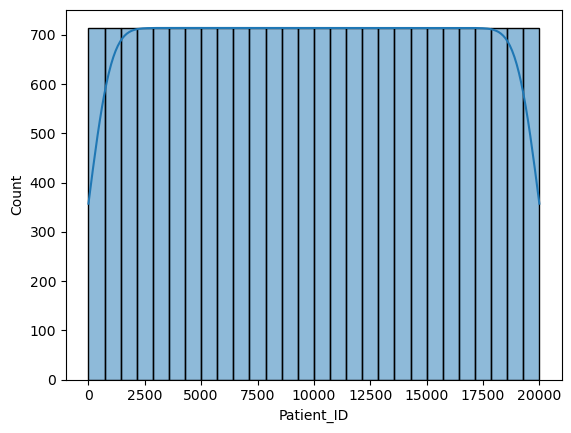

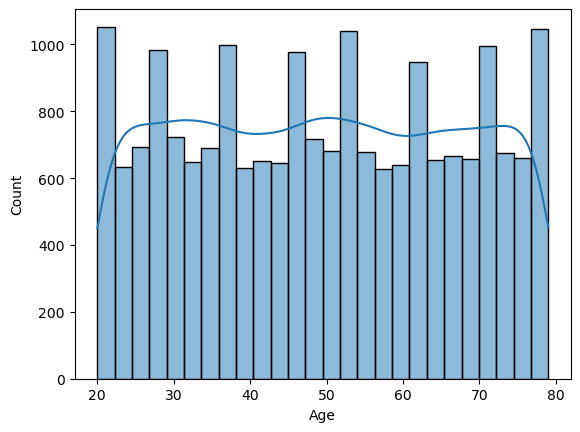

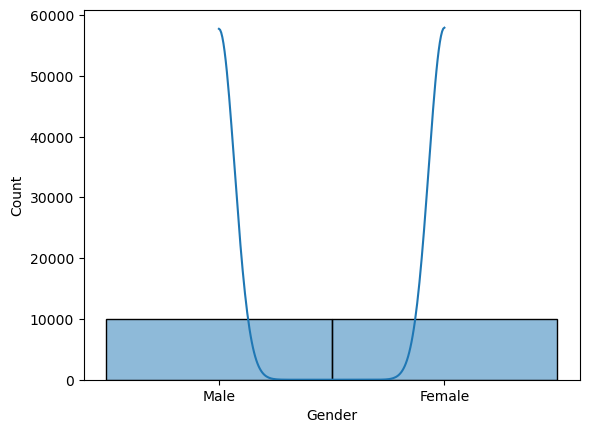

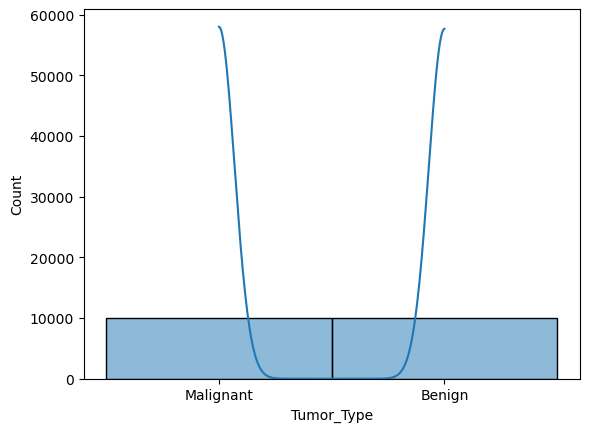

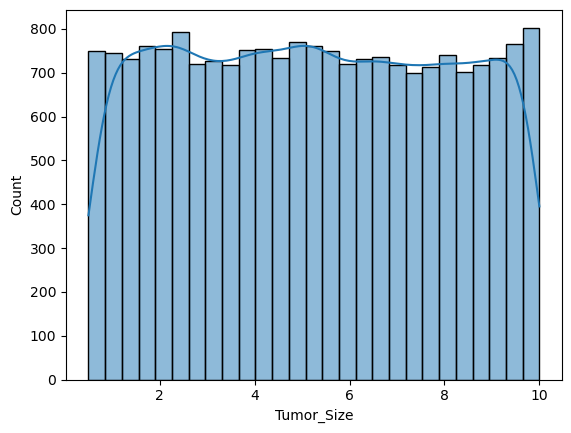

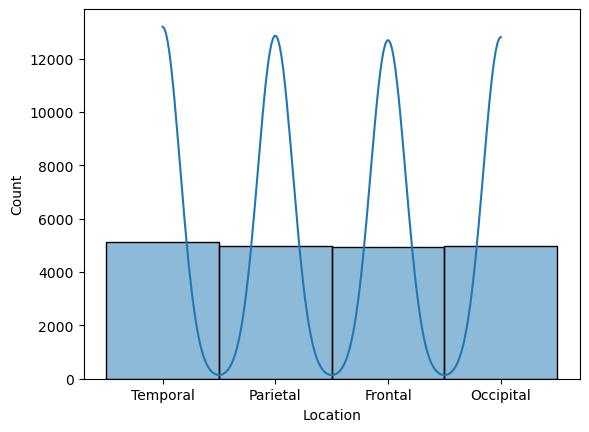

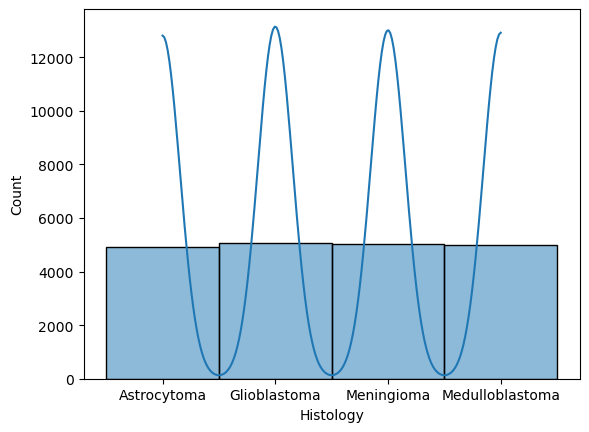

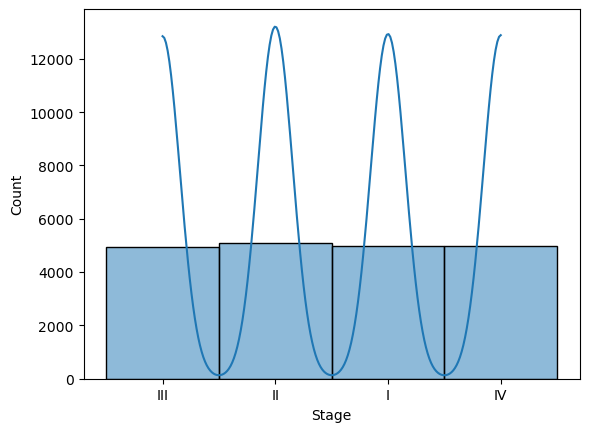

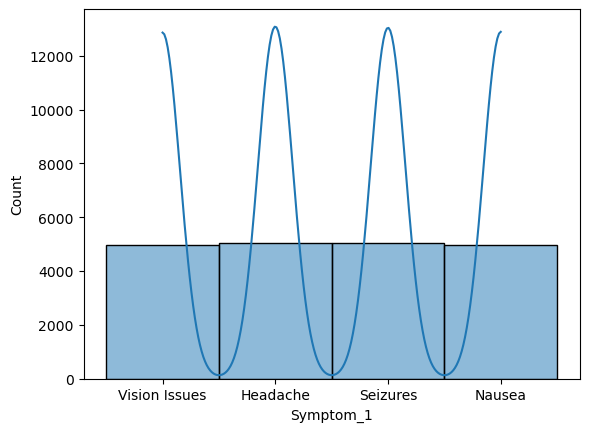

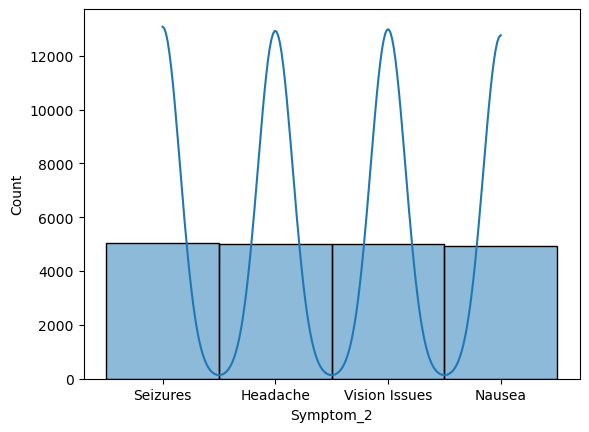

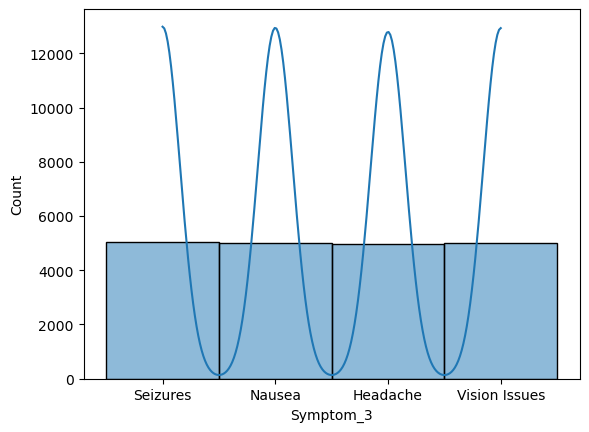

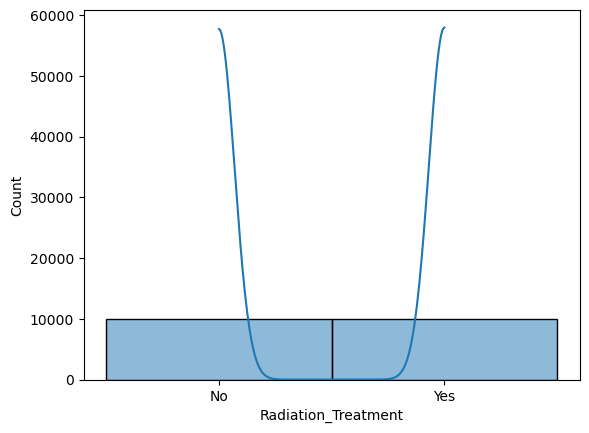

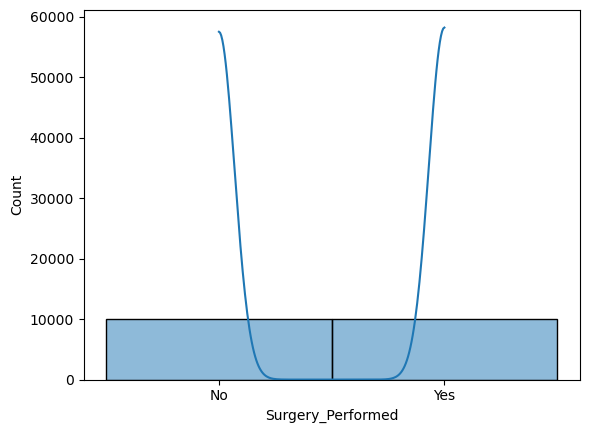

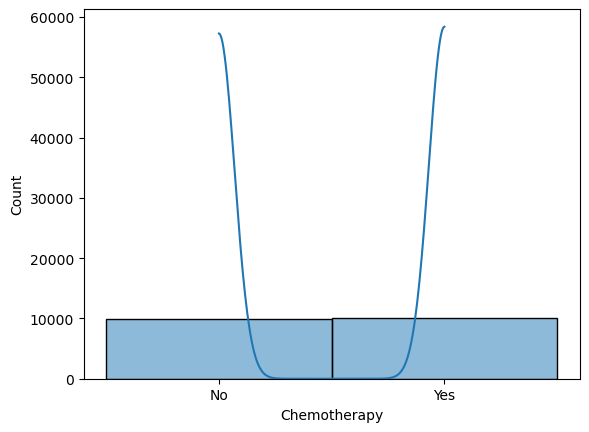

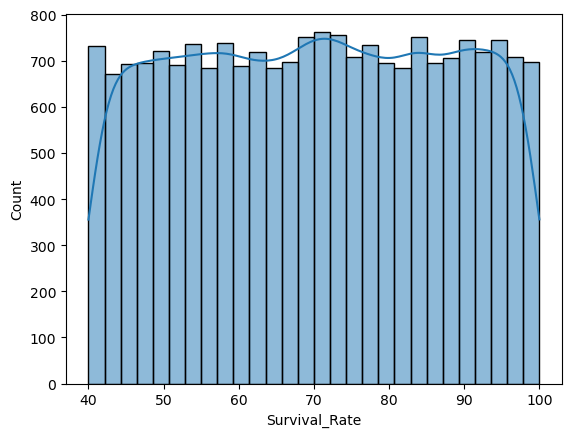

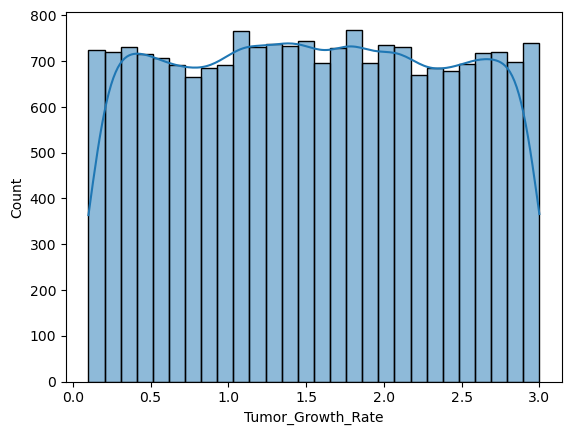

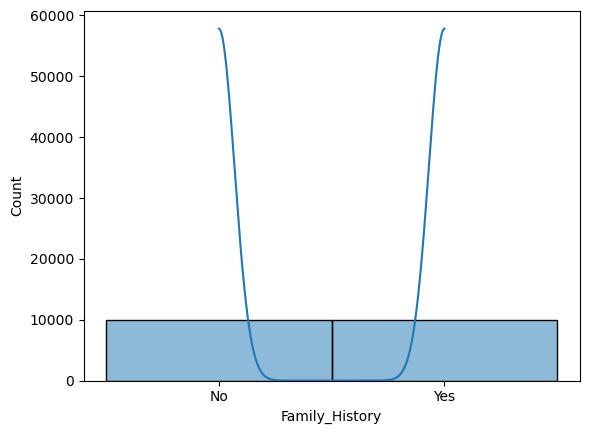

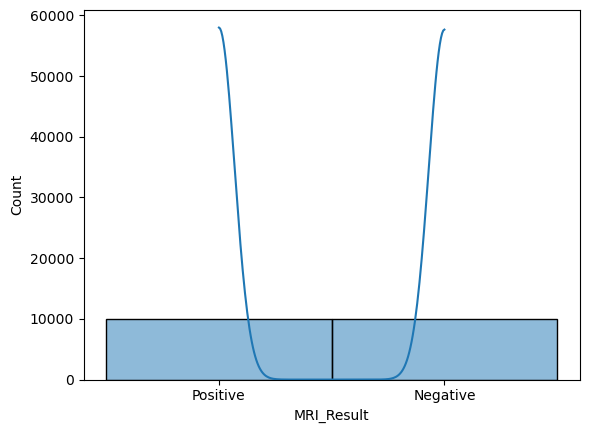

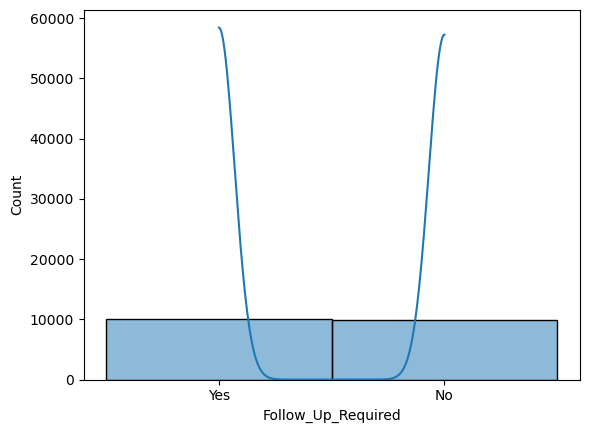

In [12]:
for col in df.columns:
    sns.histplot(data = df, x=col, kde=30)
    plt.show()

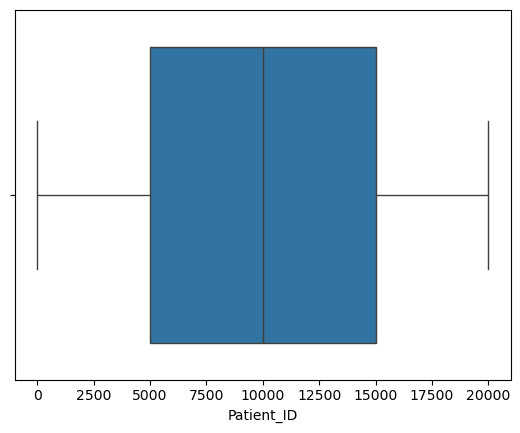

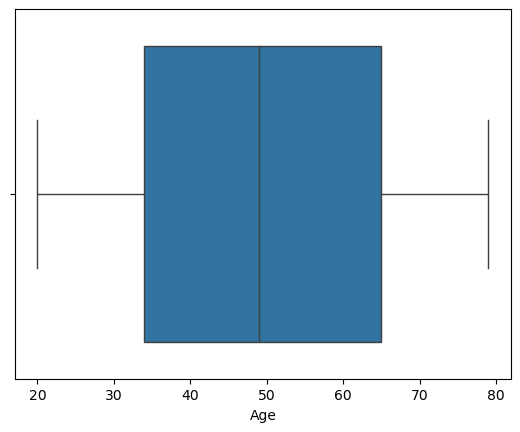

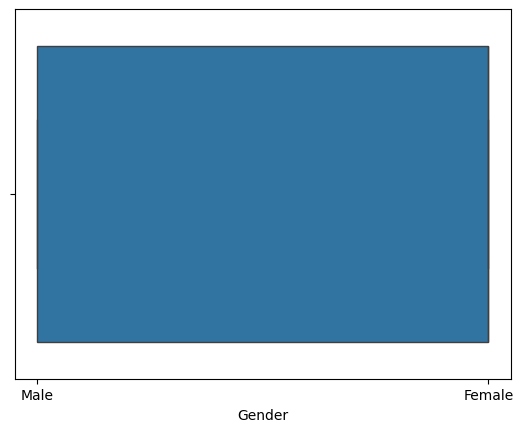

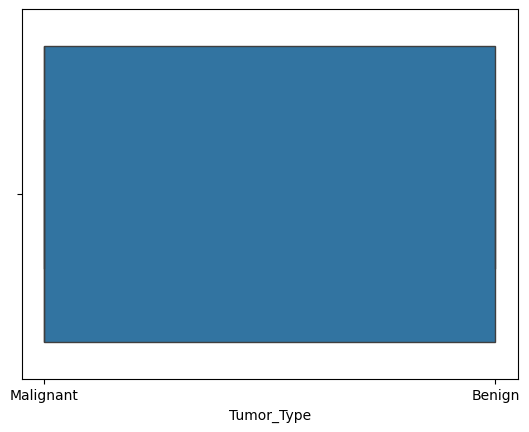

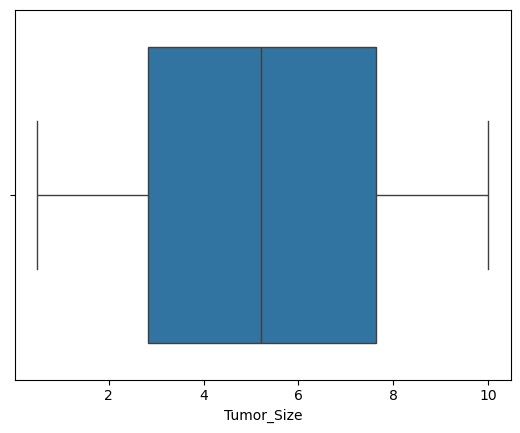

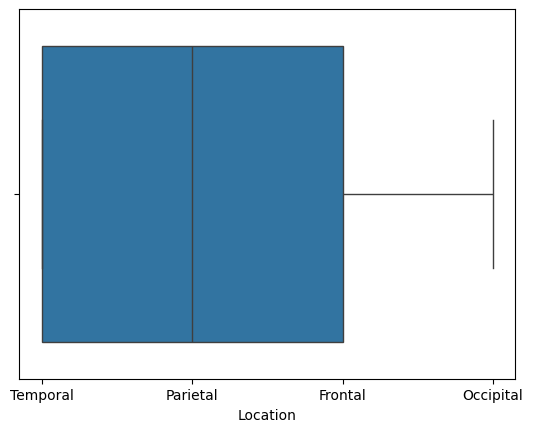

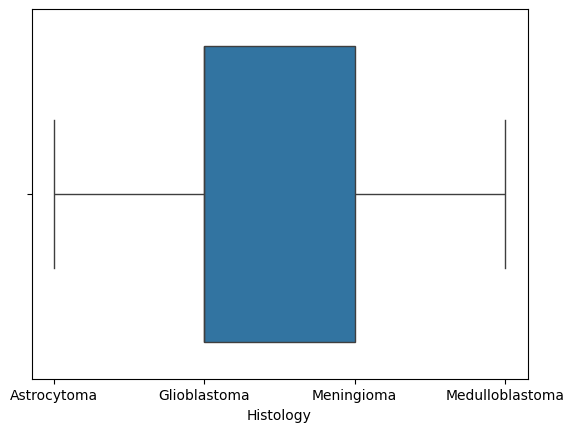

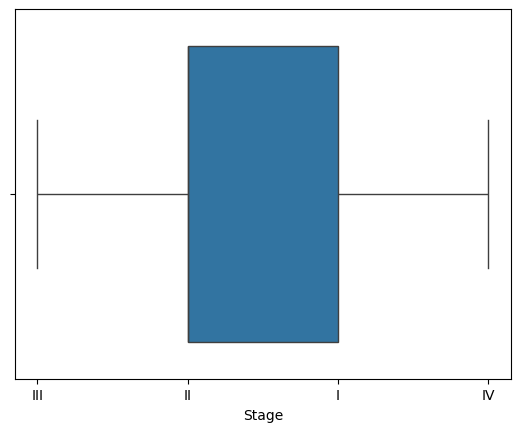

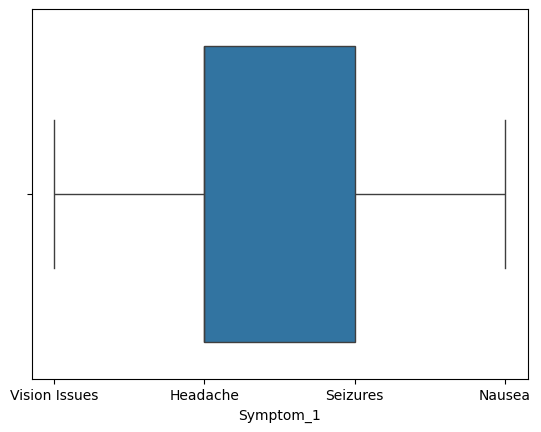

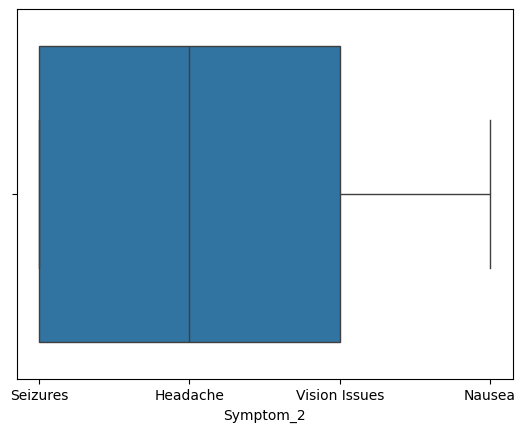

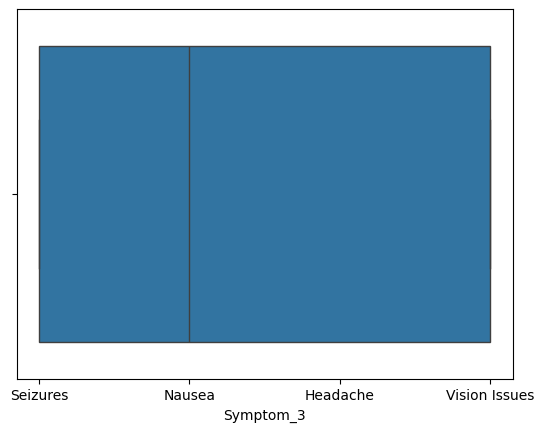

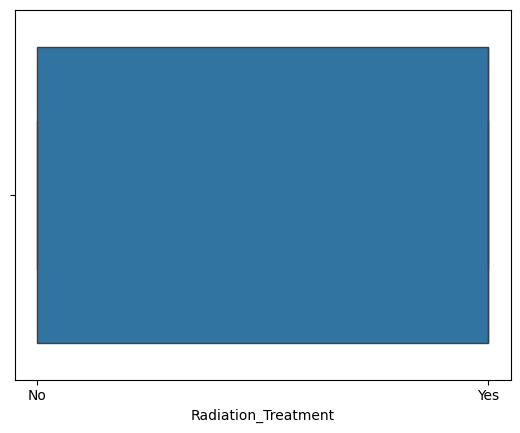

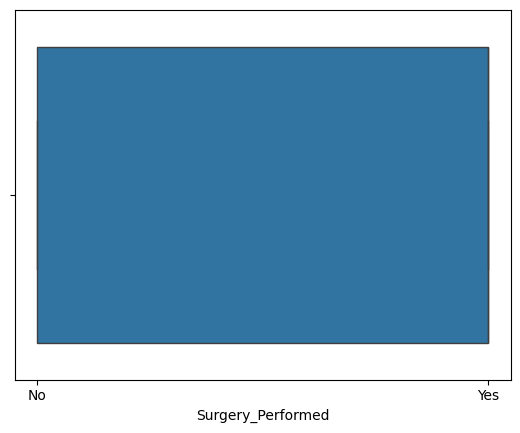

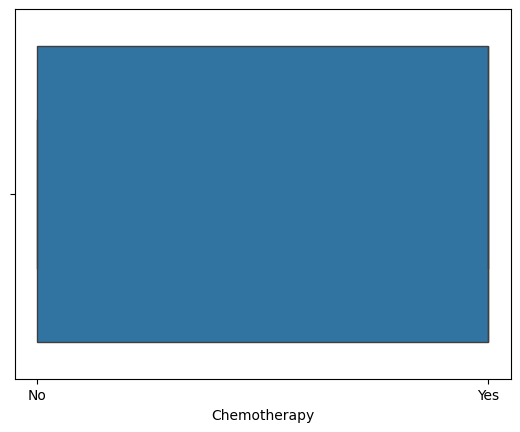

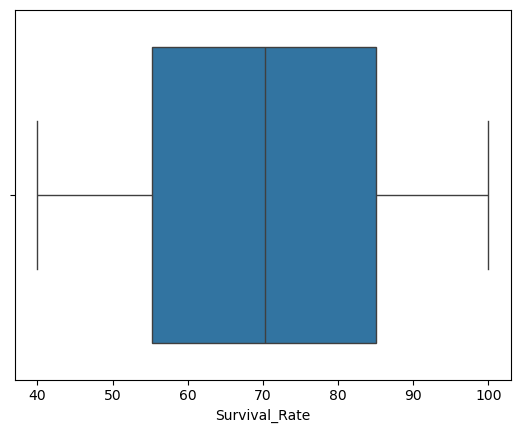

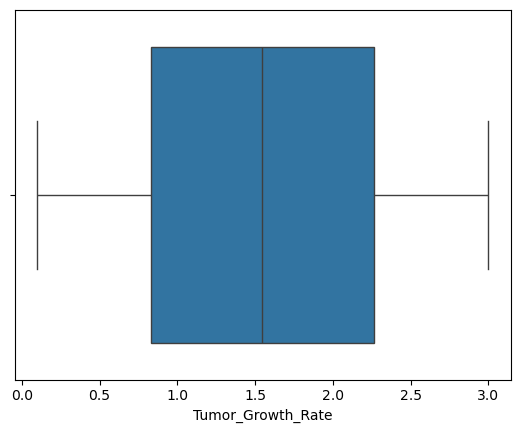

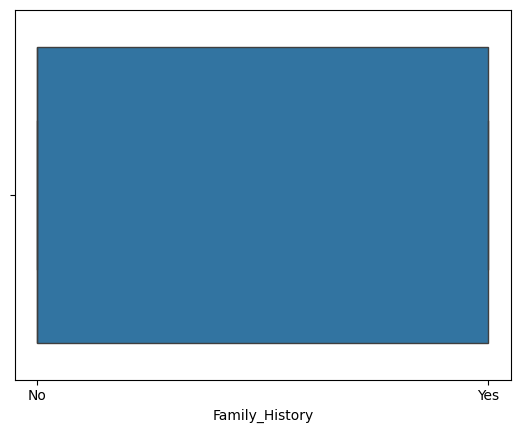

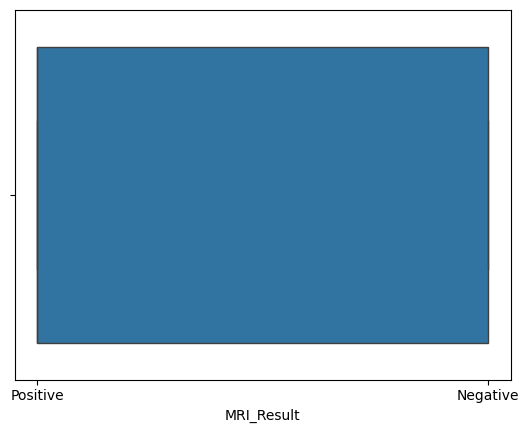

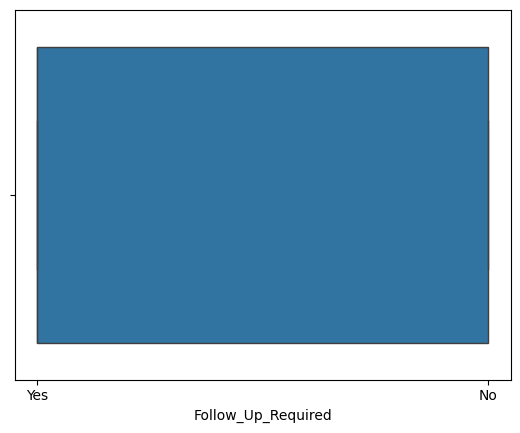

In [13]:
for col in df.columns:
    sns.boxplot(data = df, x=col)
    plt.show()

In [14]:
categorical_cols = [
    'Gender', 'Tumor_Type', 'Location', 'Histology', 'Stage',
    'Symptom_1', 'Symptom_2', 'Symptom_3', 'Radiation_Treatment',
    'Surgery_Performed', 'Chemotherapy', 'Family_History',
    'MRI_Result', 'Follow_Up_Required'
]

In [15]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le     #label encodes all the categorical columns
    
    
scaler = StandardScaler()
numerical_cols = ['Age', 'Tumor_Size', 'Tumor_Growth_Rate']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.drop('Patient_ID', axis=1, inplace=True)

print(df.head())
print(df.info())    
    
    

        Age  Gender  Tumor_Type  Tumor_Size  Location  Histology  Stage  \
0  1.355253       1           1    0.050488         3          0      2   
1 -1.347627       1           0   -0.141399         2          1      1   
2 -1.060087       1           0    0.127742         2          3      0   
3 -1.175103       1           1   -1.379648         3          2      3   
4  0.262599       0           0   -1.023511         2          1      0   

   Symptom_1  Symptom_2  Symptom_3  Radiation_Treatment  Surgery_Performed  \
0          3          2          2                    0                  0   
1          0          0          1                    1                  1   
2          3          0          2                    0                  0   
3          3          2          0                    1                  0   
4          0          0          2                    0                  0   

   Chemotherapy  Survival_Rate  Tumor_Growth_Rate  Family_History  MRI_Result  \

In [16]:
df

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1.355253,1,1,0.050488,3,0,2,3,2,2,0,0,0,51.312579,-1.717548,0,1,1
1,-1.347627,1,0,-0.141399,2,1,1,0,0,1,1,1,1,46.373273,0.739298,1,1,1
2,-1.060087,1,0,0.127742,2,3,0,3,0,2,0,0,0,47.072221,0.402556,0,0,0
3,-1.175103,1,1,-1.379648,3,2,3,3,2,0,1,0,1,51.853634,-0.316229,1,0,0
4,0.262599,0,0,-1.023511,2,1,0,0,0,2,0,0,1,54.708987,0.624153,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.635167,1,1,1.588598,2,2,2,2,1,3,0,0,1,58.229662,-1.428149,0,0,1
19996,-1.002579,0,0,-1.340814,3,3,2,0,0,3,1,1,0,77.706856,0.949040,0,1,0
19997,0.435123,0,0,-0.587417,3,2,0,2,3,1,0,0,1,89.543803,0.939239,0,1,1
19998,1.067712,1,1,1.191789,2,1,2,2,0,3,1,1,1,83.306781,1.004218,0,1,0


In [17]:
df.describe()

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
count,2.000000e+04,20000.000000,20000.00000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.00000,20000.000000
mean,-9.450218e-17,0.499200,0.50150,1.122658e-16,1.515050,1.503700,1.495150,1.494950,1.504800,1.504350,0.501050,0.503000,0.504850,70.131699,1.264766e-16,0.499900,0.50145,0.505050
std,1.000025e+00,0.500012,0.50001,1.000025e+00,1.119882,1.115952,1.115992,1.118185,1.118722,1.116308,0.500011,0.500004,0.499989,17.270834,1.000025e+00,0.500012,0.50001,0.499987
min,-1.692676e+00,0.000000,0.00000,-1.719551e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.002386,-1.731734e+00,0.000000,0.00000,0.000000
25%,-8.875624e-01,0.000000,0.00000,-8.713193e-01,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,55.224439,-8.580033e-01,0.000000,0.00000,0.000000
50%,-2.494125e-02,0.000000,1.00000,-1.302598e-02,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,70.305066,-7.034629e-03,0.000000,1.00000,1.000000
75%,8.951880e-01,1.000000,1.00000,8.669190e-01,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,85.043395,8.550300e-01,1.000000,1.00000,1.000000
max,1.700301e+00,1.000000,1.00000,1.729254e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,99.998125,1.737056e+00,1.000000,1.00000,1.000000


In [18]:
print(df[categorical_cols].nunique())

Gender                 2
Tumor_Type             2
Location               4
Histology              4
Stage                  4
Symptom_1              4
Symptom_2              4
Symptom_3              4
Radiation_Treatment    2
Surgery_Performed      2
Chemotherapy           2
Family_History         2
MRI_Result             2
Follow_Up_Required     2
dtype: int64


In [19]:
df['Follow_Up_Required'].value_counts()

Follow_Up_Required
1    10101
0     9899
Name: count, dtype: int64

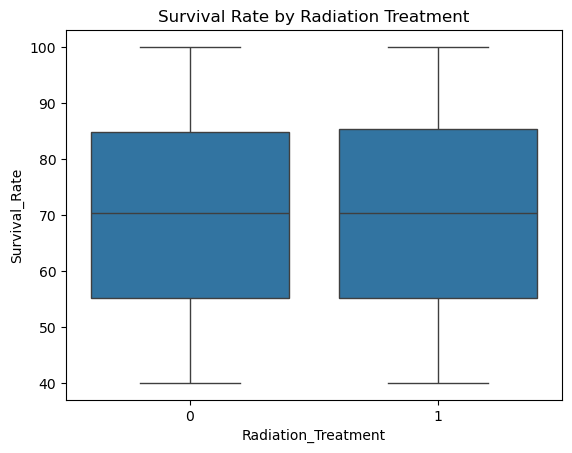

In [20]:
sns.boxplot(x='Radiation_Treatment', y='Survival_Rate', data=df)
plt.title('Survival Rate by Radiation Treatment')
plt.show()


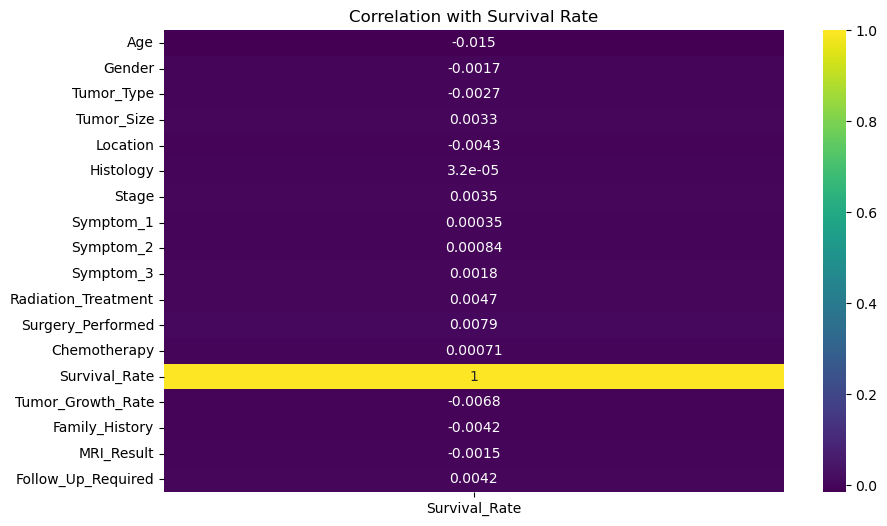

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr()[['Survival_Rate']], annot=True, cmap='viridis')
plt.title('Correlation with Survival Rate')
plt.show()


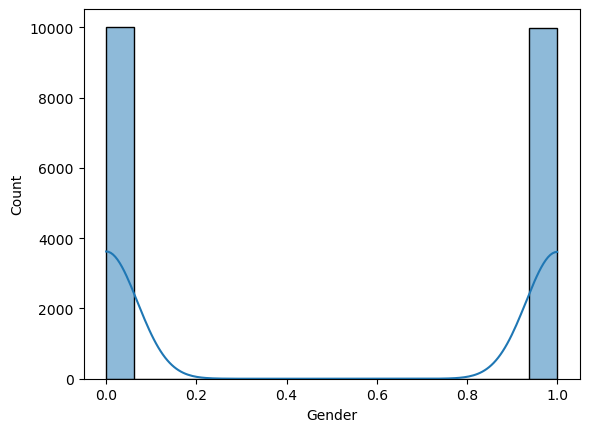

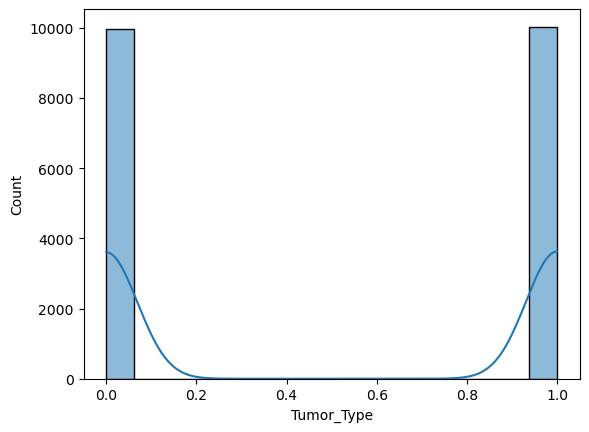

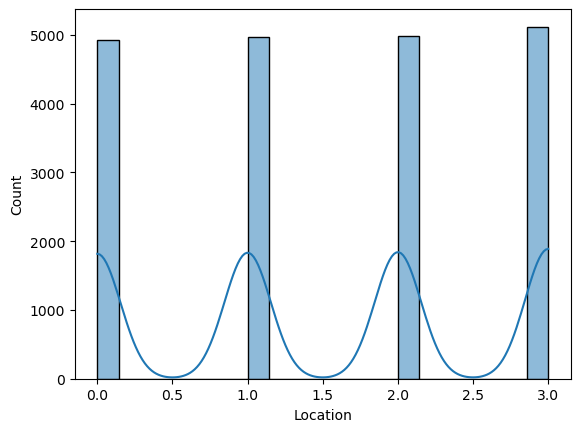

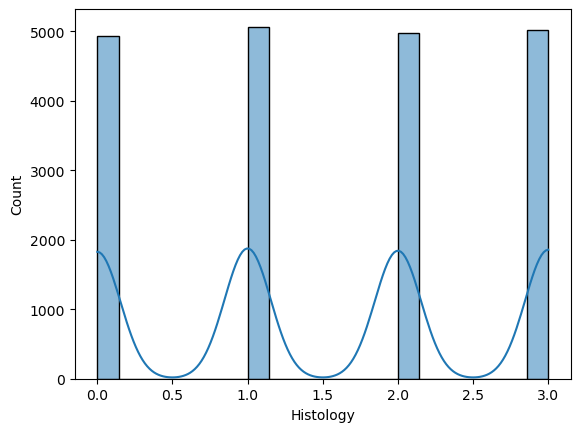

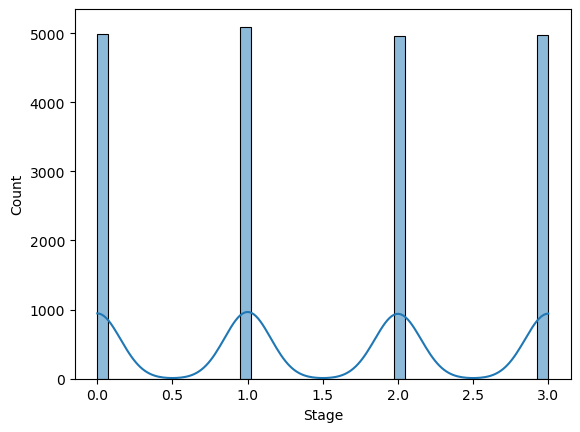

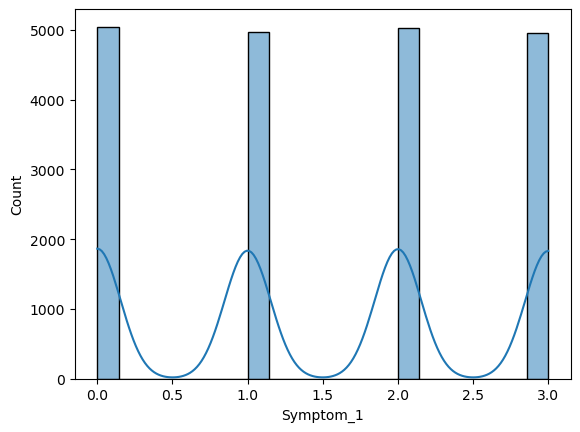

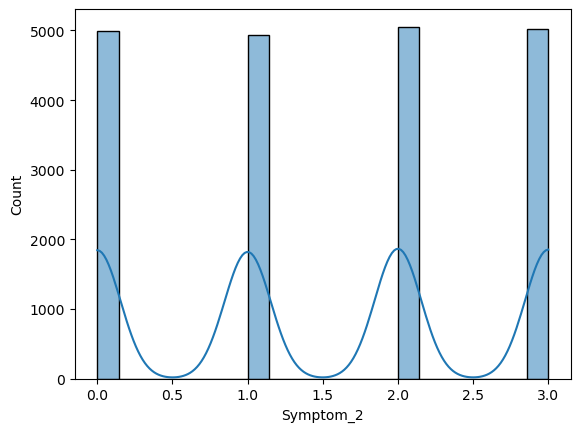

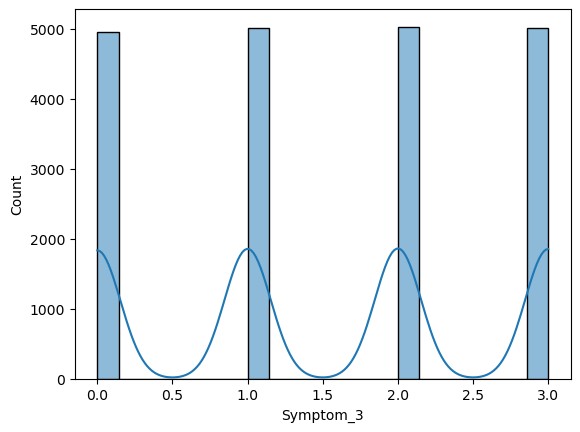

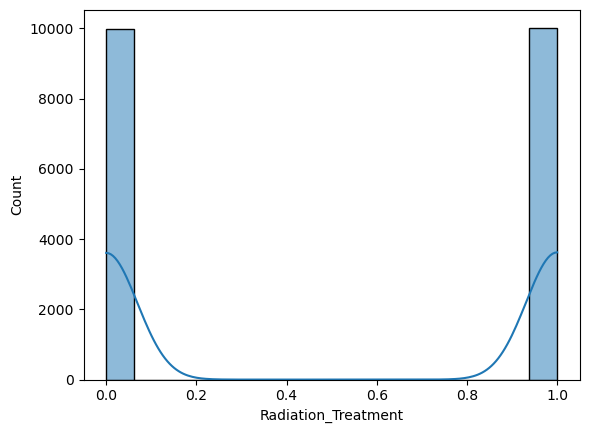

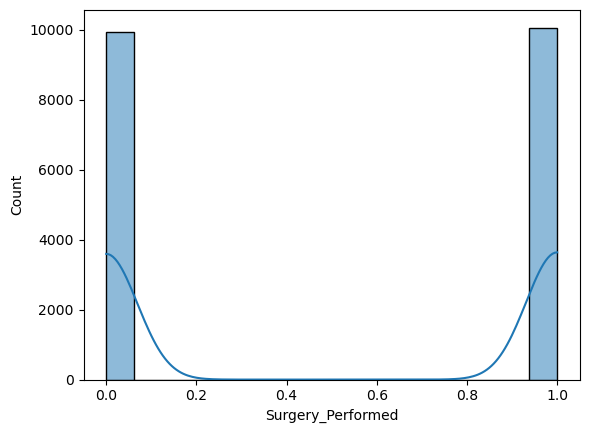

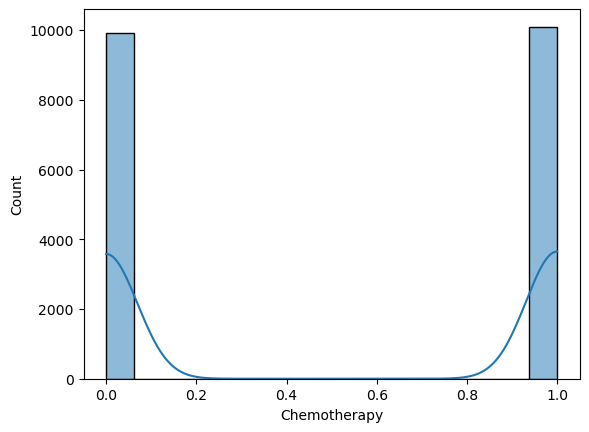

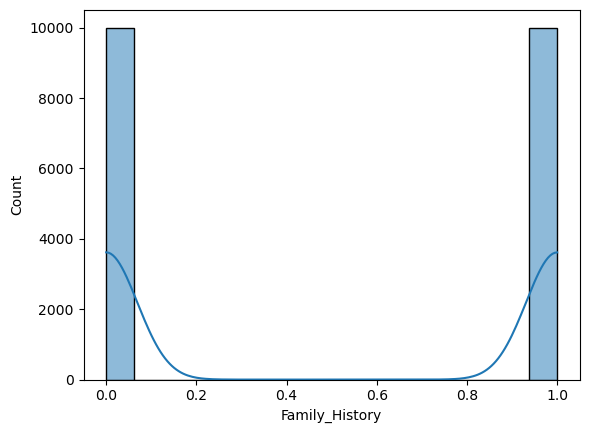

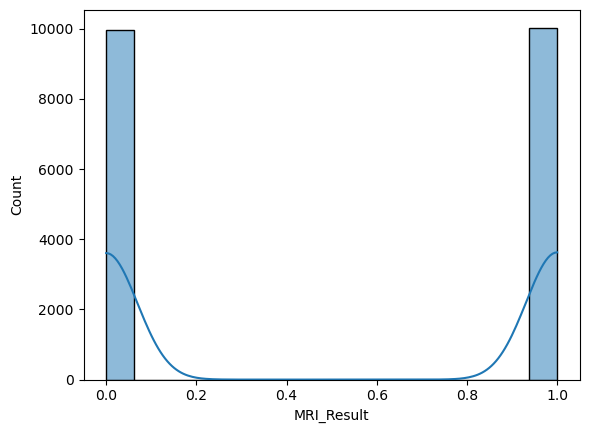

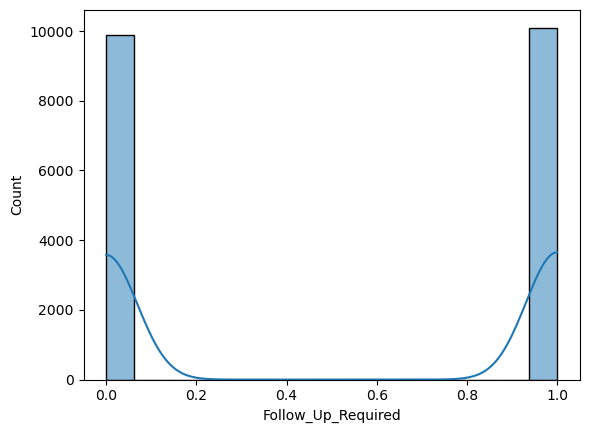

In [22]:
for col in categorical_cols:
    sns.histplot(data = df, x=col, kde=30)
    plt.show()

In [23]:
X = df.drop('Follow_Up_Required', axis=1)
y = df['Follow_Up_Required']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
X_train

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result
17218,1.125220,1,0,-1.368742,1,1,3,2,0,2,0,0,0,88.554940,0.254617,0,1
15188,1.412761,1,1,-1.454099,3,1,2,1,3,0,1,0,1,89.613276,0.912780,1,0
11295,-1.060087,1,0,0.037900,1,0,3,0,1,2,0,0,1,40.636728,1.347091,1,0
19772,-0.945070,1,0,-1.711791,0,2,0,0,0,0,0,1,1,87.864727,-0.029699,1,0
13072,0.262599,1,1,-0.189694,3,0,2,2,0,1,1,1,0,79.154867,1.619806,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.205091,0,1,1.211932,0,3,0,0,3,2,0,1,1,64.500978,0.303489,0,0
11964,-1.117595,0,0,1.200334,1,1,3,0,3,0,0,1,0,59.811256,1.569424,0,0
5390,-0.600022,0,1,-0.269316,0,1,0,2,0,0,1,0,0,83.809921,1.354639,0,0
860,-0.657530,1,0,-1.531540,3,3,0,3,0,3,0,0,1,97.815429,-0.329665,0,0


In [26]:
X_test

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result
10650,0.607648,1,1,-0.381658,3,3,1,1,0,1,0,0,1,94.739701,-1.697671,0,1
2041,-1.175103,0,1,0.419417,3,3,0,1,3,2,1,0,1,49.751461,0.211152,1,1
8668,-1.232611,1,1,-1.490967,2,1,3,3,2,3,1,1,1,95.452798,-0.381590,1,1
1114,1.125220,0,0,-1.106718,3,0,1,3,0,0,1,0,0,92.178737,-0.540259,0,0
13902,1.125220,0,1,0.221680,0,0,1,0,1,2,1,0,0,90.654556,1.037596,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4464,-0.254974,0,1,-0.143946,2,2,0,1,2,0,0,0,1,54.102919,-1.626284,1,1
15656,-1.232611,0,1,-0.641635,2,0,2,1,1,2,0,0,1,44.129585,1.622830,1,1
19146,1.182728,0,0,0.068717,3,1,1,1,0,1,0,0,1,81.490349,1.397896,1,1
10567,-1.060087,0,1,0.988300,2,3,1,3,2,2,0,1,1,55.822710,1.269506,0,0


In [27]:
y_test


10650    1
2041     0
8668     1
1114     1
13902    1
        ..
4464     1
15656    0
19146    1
10567    1
9165     1
Name: Follow_Up_Required, Length: 6000, dtype: int32

In [28]:
y_train

17218    1
15188    1
11295    1
19772    0
13072    1
        ..
11284    0
11964    0
5390     1
860      0
15795    0
Name: Follow_Up_Required, Length: 14000, dtype: int32

In [52]:
rfc_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rfc_pipeline.fit(X_train, y_train)

y_pred = rfc_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(classification_report(y_test, y_pred))



cat_pipeline = Pipeline([
    ('classifier', CatBoostClassifier(iterations=1000, learning_rate=0.03, depth=8, verbose=0, random_state=42))
])

cat_pipeline.fit(X_train, y_train)

y_pred = cat_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



xgb_pipeline = Pipeline([
    ('classifier', XGBClassifier(n_estimators=100, random_state=42))
])

xgb_pipeline.fit(X_train, y_train)

y_pred = xgb_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.5048333333333334
Confusion Matrix:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      2971
           1       0.51      0.51      0.51      3029

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.50      0.50      0.50      6000

Accuracy: 0.5126666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      2971
           1       0.52      0.54      0.53      3029

    accuracy                           0.51      6000
   macro avg       0.51      0.51      0.51      6000
weighted avg       0.51      0.51      0.51      6000

Accuracy: 0.515
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      2971
           1       0.52      0.52      0.52      3029

    accuracy                           0.52 

In [52]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
    model = CatBoostClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, verbose=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)



In [31]:
y_pred_cat

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
y_pred_dtc

array([0, 0, 0, ..., 1, 0, 0])

In [33]:
y_pred_rfc

array([1, 1, 0, ..., 0, 1, 0])

In [34]:
y_pred_xgb

array([1, 1, 0, ..., 0, 1, 0])

In [48]:
cat_acc = accuracy_score(y_test, y_pred_cat)
dtc_acc = accuracy_score(y_test, y_pred_dtc)
rfc_acc = accuracy_score(y_test, y_pred_rfc)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
cat_mse = mean_squared_error(y_test, y_pred)
rfr_mse = mean_squared_error(y_test, y_pred_rfc)

print(rfr_mse)
print(cat_acc)
print(dtc_acc)
print(rfc_acc)
print(xgb_acc)
print(cat_r_acc)

0.493
0.5048333333333334
0.5026666666666667
0.507
0.515
0.25741776320897375
